In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(7.933893067695294, -134.60389188135048), (-57.18730858880863, -174.56726511313386), (-37.26818829783621, 47.136643567634735), (0.8320253731468199, -134.51066129415847), (69.99226146432247, -138.81106347496518), (15.092344931862002, -171.40432276546954), (-82.32721841937595, 141.6517766016397), (-46.08498909961584, 115.96257844142218), (15.914079650405455, 123.5619986306217), (-21.64686100229406, -119.3956630956651), (-83.61337482819273, -119.58672348597631), (19.64429096383367, -173.3767409306353), (22.821073423298827, -179.63500547708165), (19.877400959780715, -105.44342026973911), (85.74153145290936, -88.34614457198681), (-17.541734104132104, -136.31830471562537), (-72.12703988146293, -54.73783764072982), (-46.84480210227629, -66.875153057176), (41.99793052436013, -35.83547814729104), (-51.70454462159682, -57.42251212057103), (-64.85353834747754, -33.43209499091614), (17.29667425999422, -96.71016324638089), (16.775322564447677, 106.43583841696642), (8.238361325089514, -126.78523741

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | dicabisagan
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | tomatlan
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | comodoro rivadavia
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | nazareno etla
Processing Record 18 of Set 1 | dong hoi
Processing Record 19 of Set 1 | lookan
Processing Record 20 of Set 1 | cheuskiny
City not found. Skipping...
Processing Record 21 of Set 1 | chokurdakh
Processing Rec

Processing Record 36 of Set 4 | puerto ayora
Processing Record 37 of Set 4 | maumere
Processing Record 38 of Set 4 | alta floresta
Processing Record 39 of Set 4 | samusu
City not found. Skipping...
Processing Record 40 of Set 4 | kharan
Processing Record 41 of Set 4 | lasa
Processing Record 42 of Set 4 | betsiamites
Processing Record 43 of Set 4 | cherskiy
Processing Record 44 of Set 4 | caorle
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | kaihua
Processing Record 47 of Set 4 | alihe
Processing Record 48 of Set 4 | vitim
Processing Record 49 of Set 4 | saint-leu
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | tlacolula
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | inyonga
Processing Record 4 of Set 5 | husavik
Processing Record 5 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 5 | dalvik
Processing Record 7 of Set 5 | asau
Processing Record 8 of 

City not found. Skipping...
Processing Record 30 of Set 8 | horta
Processing Record 31 of Set 8 | bulgan
Processing Record 32 of Set 8 | veraval
Processing Record 33 of Set 8 | palestine
Processing Record 34 of Set 8 | perevolotskiy
Processing Record 35 of Set 8 | nuuk
Processing Record 36 of Set 8 | nantucket
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | brokopondo
Processing Record 39 of Set 8 | port lincoln
Processing Record 40 of Set 8 | udachnyy
Processing Record 41 of Set 8 | xingtai
Processing Record 42 of Set 8 | galle
Processing Record 43 of Set 8 | talara
Processing Record 44 of Set 8 | tiksi
Processing Record 45 of Set 8 | iqaluit
Processing Record 46 of Set 8 | leningradskiy
Processing Record 47 of Set 8 | palmer
Processing Record 48 of Set 8 | namibe
Processing Record 49 of Set 8 | port hardy
Processing Record 50 of Set 8 | saint-augustin
Processing Record 1 of Set 9 | lardos
Processing Record 2 of Set 9 | kyzyl-suu
Processing Record 3 of Set

Processing Record 16 of Set 12 | lodja
Processing Record 17 of Set 12 | novosil
Processing Record 18 of Set 12 | hobyo
Processing Record 19 of Set 12 | penzance
Processing Record 20 of Set 12 | souillac
Processing Record 21 of Set 12 | bontang
Processing Record 22 of Set 12 | barroualie
City not found. Skipping...
Processing Record 23 of Set 12 | itoman
Processing Record 24 of Set 12 | kuah
Processing Record 25 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 12 | qiyang
Processing Record 27 of Set 12 | saint anthony
Processing Record 28 of Set 12 | havoysund
Processing Record 29 of Set 12 | yamada
Processing Record 30 of Set 12 | mecca
Processing Record 31 of Set 12 | vagur
Processing Record 32 of Set 12 | ust-maya
Processing Record 33 of Set 12 | tautira
Processing Record 34 of Set 12 | okato
Processing Record 35 of Set 12 | kalamare
Processing Record 36 of Set 12 | tandil
Processing Record 37 of Set 12 | khonuu
City not found. Skipping...
Processing Recor

In [16]:
len(city_data)

588

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,76.55,76,34,22.15,PF,2022-09-20 18:12:51
1,Vaini,-21.2000,-175.2000,71.76,94,40,8.05,TO,2022-09-20 18:12:02
2,Aklavik,68.2191,-135.0107,42.80,87,100,3.44,CA,2022-09-20 18:12:16
3,Kapaa,22.0752,-159.3190,80.92,70,20,11.50,US,2022-09-20 18:11:57
4,Hobart,-42.8794,147.3294,53.46,62,100,6.91,AU,2022-09-20 18:11:26
5,Albany,42.6001,-73.9662,72.95,78,90,1.01,US,2022-09-20 18:15:27
6,Dicabisagan,17.0818,122.4157,76.32,89,100,3.27,PH,2022-09-20 18:14:33
7,Rikitea,-23.1203,-134.9692,72.93,73,0,15.75,PF,2022-09-20 18:12:20
8,Punta Arenas,-53.1500,-70.9167,50.02,53,75,14.97,CL,2022-09-20 18:15:05
9,Tomatlan,19.9333,-105.2500,85.91,65,74,3.47,MX,2022-09-20 18:13:40


In [18]:
#reorder columns 
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [19]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-09-20 18:12:51,-9.8000,-139.0333,76.55,76,34,22.15
1,Vaini,TO,2022-09-20 18:12:02,-21.2000,-175.2000,71.76,94,40,8.05
2,Aklavik,CA,2022-09-20 18:12:16,68.2191,-135.0107,42.80,87,100,3.44
3,Kapaa,US,2022-09-20 18:11:57,22.0752,-159.3190,80.92,70,20,11.50
4,Hobart,AU,2022-09-20 18:11:26,-42.8794,147.3294,53.46,62,100,6.91
...,...,...,...,...,...,...,...,...,...
583,Nawalgarh,IN,2022-09-20 18:20:43,27.8500,75.2667,82.42,57,53,2.62
584,Ewa Beach,US,2022-09-20 18:20:43,21.3156,-158.0072,82.35,63,0,15.01
585,Shebalino,RU,2022-09-20 18:20:44,51.2917,85.6772,47.86,62,32,3.33
586,Lavrentiya,RU,2022-09-20 18:20:44,65.5833,-171.0000,36.84,74,61,0.67


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


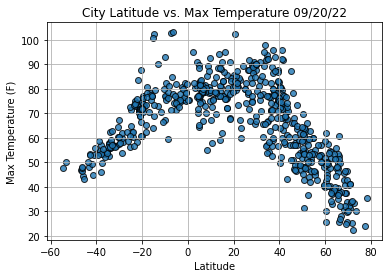

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

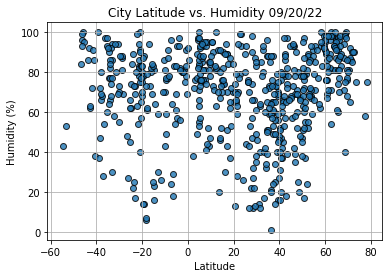

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

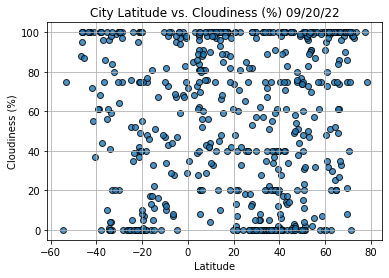

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

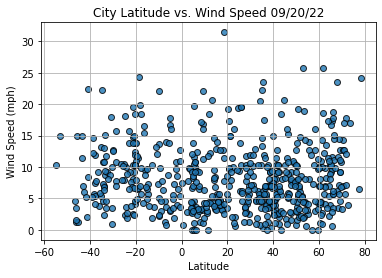

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()